
**Name**: 

**Student ID**:

**Date**:

<hr>

##### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, chisquared, t, and F distributions

#### Due: 03/22/2022 by 18:30

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}$

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

<hr>
<hr>

## Problem 1 (Making a Model)
A project management team want to model the number of two types of users, called type $A$ and type $B$, over time. The model they want to use has the overall number of users growing linearly over time. At time $t=0$ (not necessarily the website launching date) the linear model should have expected number of users equal in the two groups. At time $t=100$, they introduce a new feature. They think this could change the slope at time $t=100$ but only for users of type $A$ (it changes the *slope*, hence would not put a jump discontinuity into the expected number of users).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model). 

*The point*: as data scientistis/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$s and $y$s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove. 

<hr> 
<hr>

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.

The model at hand is a two-phase linear regression model, in which after $t=100$ the slope of the model changes.
The model I would use is $y= \beta_1 TypeA + \beta_2 TypeB + \beta_3 [TypeA - 100]_t$
$Z_t = max{0, 100-t}$

At $t=0$, I would set $beta_1 TypeA = \beta_2 TypeB$. If the intervention had really changed the slope of $TypeA$ group, it would be reflected in $\beta_3$ coefficient

2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model).

If the intervention did not do anything, the coefficient $\beta_3$, that its corresponding feature only starts to work at $t=100$, would be zero.

## Problem 2 (Linerization trick in Sinusiodal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \sin\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?
2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?
3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are a function of $(\beta_0, \beta_1', \beta_2')$. Find this function.

<hr> 
<hr>

1. No, the model is not linear. Not all of the coefficients $\beta_i$ , $\Sigma_{i=0}^{3}$ are parameters of features.
2. Yes. All of the coefficients, $\beta_0$, $\beta_1$, $\beta_2$ are in the power of 1 and are parameters of features, hence the model is linear.
3.

## Problem 3 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outlayers, mark and remove those; explain your logic. 
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.

<hr>
<hr>

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("winequality-red.csv", delimiter=";")
cols = ["density", "alcohol", "pH", "volatile acidity", "quality"]
df = df.filter(cols)
stats = {}
stats_cols = ['Mean', 'Variance', 'Median', 'Q1', 'Q3', 'IQR', 'AbsoluteRange']
for col in cols[:len(cols)-1]:
    mean = df.describe()[col]['mean']
    var = df.describe()[col]['std']**2
    median = df.describe()[col]['50%']
    first_q = df.describe()[col]['25%']
    third_q = df.describe()[col]['75%']
    iqr = third_q - first_q
    abs_range = df.describe()[col]['max'] - df.describe()[col]['min']
    stats.update({col: [mean, var, median, first_q, third_q, iqr, abs_range]})
stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=stats_cols)
print(stats_df)

                       Mean  Variance    Median      Q1         Q3       IQR  \
density            0.996747  0.000004   0.99675  0.9956   0.997835  0.002235   
alcohol           10.422983  1.135647  10.20000  9.5000  11.100000  1.600000   
pH                 3.311113  0.023835   3.31000  3.2100   3.400000  0.190000   
volatile acidity   0.527821  0.032062   0.52000  0.3900   0.640000  0.250000   

                  AbsoluteRange  
density                 0.01362  
alcohol                 6.50000  
pH                      1.27000  
volatile acidity        1.46000  


In [24]:
def clean_outliers(df ,column_to_clean, print_df=True, add_z_score_col=False, z_score_threshold=3):
    """
    Uses z-score test to clean a DF from outliers. Takes in a numerical column.
    The default z-score threshold is 3, to capture 99.8% of the data, but can be altered.
    The add_z_score_col flag adds a fitting z-score column to the DF as a default, but can be altered.
    Calculation of the z-score is done manually.
    """
    df = df.dropna(subset=[column_to_clean])
    s = df[column_to_clean]
    z_score = (s - np.mean(s)) / np.std(s)
    if add_z_score_col:
        df["{}_z_score".format(column_to_clean)] = z_score
    mask = abs(z_score) > z_score_threshold
    print(f"For column {column_to_clean}, there are {len(df[mask])} outliers.")
    if print_df:
        print(df[column_to_clean][mask])
    return df[~mask]


In [25]:
for col in cols:
    clean_outliers(df, column_to_clean=col)

For column density, there are 18 outliers.
442     1.00320
480     1.00260
554     1.00315
555     1.00315
557     1.00315
608     1.00260
836     0.99064
837     0.99064
889     1.00289
1017    0.99007
1018    0.99007
1114    0.99020
1269    0.99080
1270    0.99084
1434    1.00369
1435    1.00369
1474    1.00242
1476    1.00242
Name: density, dtype: float64
For column alcohol, there are 8 outliers.
142     14.0
144     14.0
467     14.0
588     14.0
652     14.9
821     14.0
1269    14.0
1270    14.0
Name: alcohol, dtype: float64
For column pH, there are 8 outliers.
45      3.90
95      3.85
151     2.74
695     3.90
1111    3.78
1300    3.78
1316    4.01
1321    4.01
Name: pH, dtype: float64
For column volatile acidity, there are 10 outliers.
38      1.130
120     1.070
126     1.330
127     1.330
199     1.090
672     1.240
690     1.185
724     1.115
1299    1.580
1312    1.180
Name: volatile acidity, dtype: float64
For column quality, there are 10 outliers.
459     3
517     3
690

In [27]:
cov_matrix = df.cov()
print(cov_matrix)

                   density   alcohol        pH  volatile acidity   quality
density           0.000004 -0.000998 -0.000100          0.000007 -0.000267
alcohol          -0.000998  1.135647  0.033832         -0.038600  0.409789
pH               -0.000100  0.033832  0.023835          0.006495 -0.007198
volatile acidity  0.000007 -0.038600  0.006495          0.032062 -0.056476
quality          -0.000267  0.409789 -0.007198         -0.056476  0.652168


<ipython-input-31-c795ed1d7bf3>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cov_matrix, dtype=np.bool))


Text(0.5, 1.0, 'Covariance Matrix')

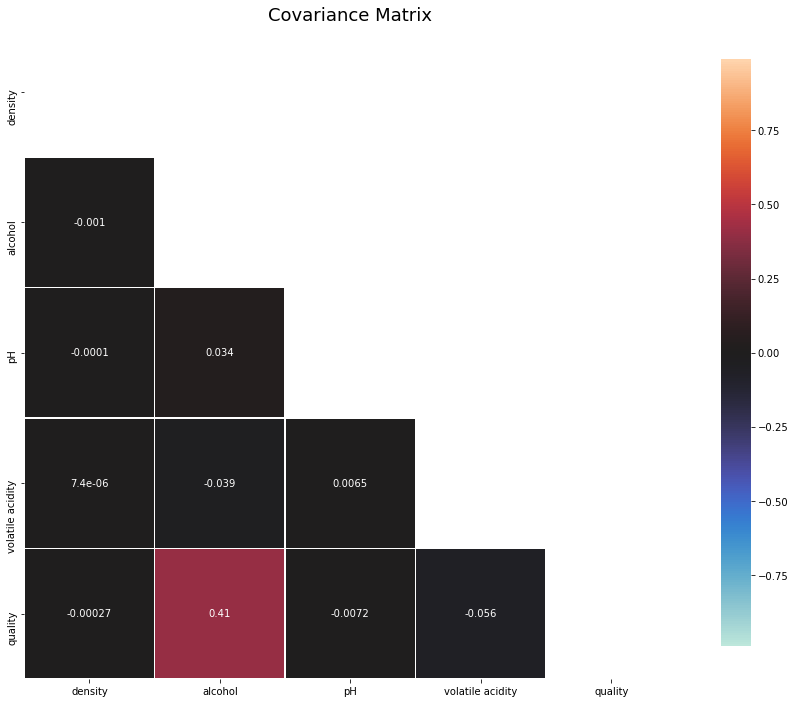

In [31]:
mask = np.triu(np.ones_like(cov_matrix, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cov_matrix, mask=mask, vmax=.99, vmin=-0.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True)
plt.title("Covariance Matrix", fontsize=18)

As visible from the covariance matrix, alcohol has the highest covariance with the target.

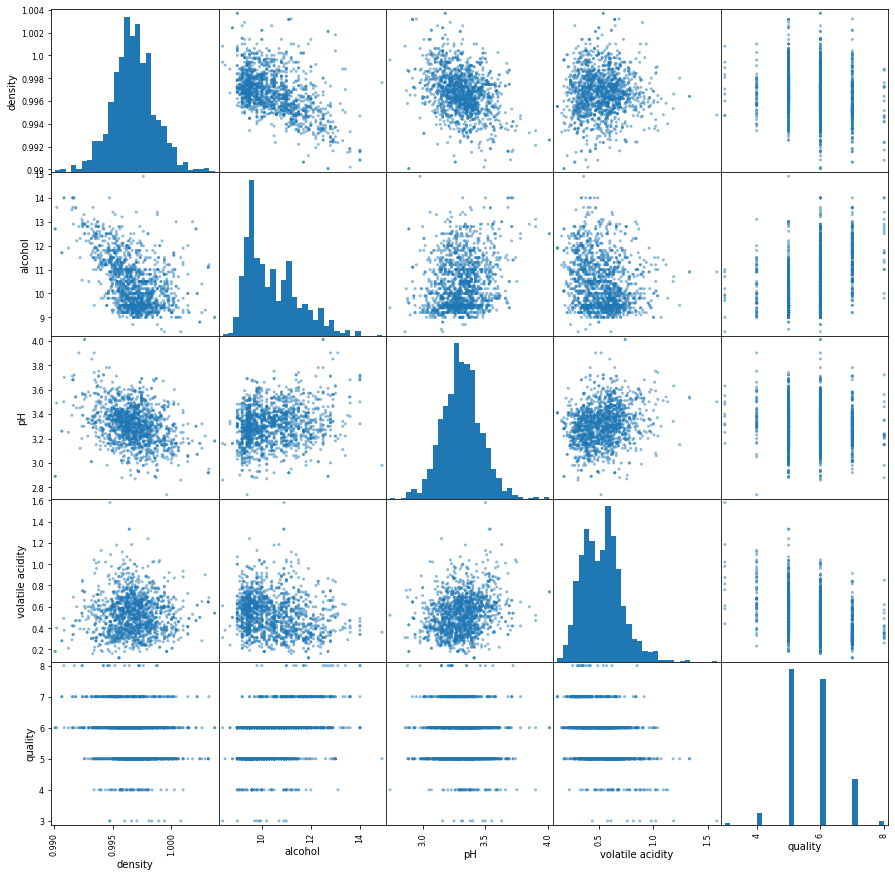

In [36]:
plt.rcParams['figure.figsize'] =  [15, 15]

pd.plotting.scatter_matrix(df, hist_kwds={'bins':30})
plt.show()
plt.rcParams["figure.figsize"] = (10,5)

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 
3. Plot the response values $y$ and the fitted response $\hat{y} = Z^\top \hat{\beta}$
4. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
5. Write a code that verifies: 
 - $\hat{S} = \|\hat{\epsilon}\|^2$
 - $H = H^\top$ 
 - $H^2 = H$
 - $(H-I)^2 = H-I$
 - $\hat{\epsilon}^\top y = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition 
 
<hr>
<hr>

In [42]:
x1 = df['density'].values
x2 = df['alcohol'].values
x3 = df['pH'].values
x4 = df['volatile acidity'].values
y = df['quality'].values

Z = np.vstack([np.ones_like(x1), x1, x2, x3, x4]).T
A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)
beta_hat = np.dot(A, y)
print(f"The vector beta hat is {beta_hat}. \nThe intersect is {beta_hat[0]:.3f}. \nThe coefficient for Density is {beta_hat[1]:.3f}. \nThe coefficient for Alcohol is {beta_hat[2]:.3f}. \nThe coefficient for pH is {beta_hat[3]:.3f}. \nThe coefficient for Volatile Acidity is {beta_hat[4]:.3f}.")

The vector beta hat is [-8.12904556 12.21377107  0.33962346 -0.38494867 -1.2774203 ]. 
The intersect is -8.129. 
The coefficient for Density is 12.214. 
The coefficient for Alcohol is 0.340. 
The coefficient for pH is -0.385. 
The coefficient for Volatile Acidity is -1.277.


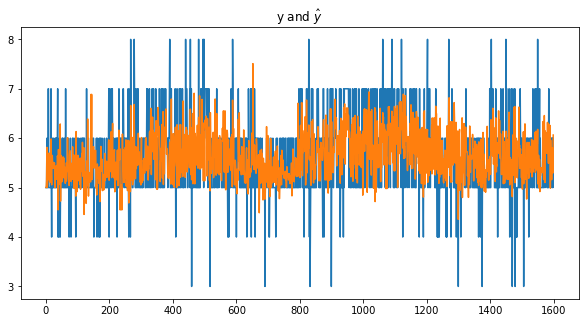

In [49]:
y_hat = np.matmul(Z, beta_hat)
plt.plot(y)
plt.plot(y_hat)
plt.title(r"y and $\hat{y}$")
plt.show()

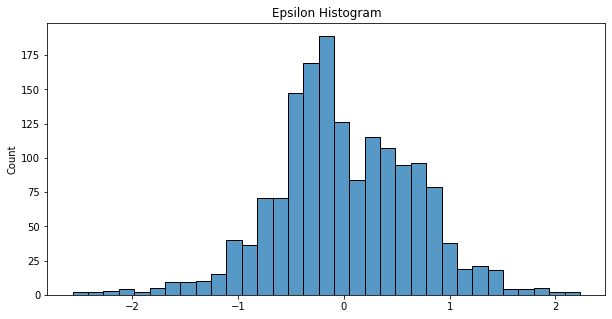

The average of the vector epsilon is 0.000


In [53]:
epsilon_hat = y - y_hat
sns.histplot(epsilon_hat)
plt.title("Epsilon Histogram")
plt.show()
print(f"The average of the vector epsilon is {np.mean(epsilon_hat):.3f}")

5. Write a code that verifies:
 - $\hat{S} = \|\hat{\epsilon}\|^2$
 - $H = H^\top$
 - $H^2 = H$
 - $(H-I)^2 = H-I$
 - $\hat{\epsilon}^\top y = 0$
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition


In [59]:
s_hat = np.sum(y-np.dot(beta_hat.T, Z.T))
# assert s_hat == np.linalg.norm(epsilon_hat)

ValueError: shapes (5,) and (1599,5) not aligned: 5 (dim 0) != 1599 (dim 0)

In [70]:
def check_equal(matrix_a, matrix_b):
    for i in range(matrix_a.shape[0]):
        for j in range(matrix_a.shape[1]):
            if matrix_a[i][j] != matrix_b[i][j]:
                return False
    return True

In [ ]:
# H = np.matmul(np.matmul(Z, np.linalg.inv(np.matmul(Z.T, Z))), Z.T)
# H == np.matmul(H, H)
#         self.H = self.X @ np.linalg.inv(self.XX) @ self.X.T

H = Z @ np.linalg.inv(Z.T @Z) @ Z.T
np.testing.assert_almost_equal((H, H @ H), bool)


$\newcommand{\var}{\mathrm{Var}}$
## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the controbution of each coordinate to the loss function. For example, this may be because not all meaasuremetns are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize 
$$
S(\beta_1,\ldots,\beta_p) := 
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (\epsilon W)^\top (\epsilon W),
$$
where $W = \diag(w_1,\ldots,w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate. 

1. Write the corresponding normal equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$. 
3. What is the hat matrix? make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix. 

<hr>
<hr>

1. Write the corresponding normal equations in a matrix form

### Answer
$\hat{\epsilon}^T WZ = 0 \Leftrightarrow  W^T Z^T \hat{\epsilon}^T \Leftrightarrow W^T Z^T Z\hat{\beta} = W^T Z^T y$

2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$.

#### Answer
$\hat{S}(\beta_1, ..., \beta_p) := \hat{\beta} := W(Z^T Z)^{-1}Z^Ty$

3. What is the hat matrix? make sure that your expression r55educes to the hat matrix from class when $W$ is the identity matrix.

### Answer

$\newcommand{\var}{\mathrm{Var}}$
## Problem 6 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following excerise, you can only sample using repeated calls to ``random.random()``.
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with the number of bins between 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretic distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed.

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike.
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly.
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [20]:
import random
from scipy.stats import norm
import numpy as np

def sample_unif(n: int) -> float:
    """
    return n independent samples from the uniform distribution over (0,1)
    """

    # YOUR CODE HERE
    pass


def sample_normal_clt(n: int) -> float:
    """
    Approximately sample from the standard normal distribution using the CLT 
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Returns:
    -------
    
    :z:    random sample approximately from the standard normal distribution
    
    """

    # YOUR CODE HERE

    pass

def sample_normal() -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Return:
    -------
    :z:    random sample from the standard normal distribution
    
    """

    # YOUR CODE HERE

    pass



def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom (DoF)
    
    Return:
    -------
    :x:    random sample from the chisquared distribution with k degrees of freedom
    
    """

    # YOUR CODE HERE
    pass


def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom
    
    Return:
    -------
    :x:    random sample from the t distribution
    
    """

    # YOUR CODE HERE
    pass


def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom
    
    Args:
    -----
    :k1:    number of degrees of freedom numerator
    :k2:    number of degrees of freedom denominator
    
    Return:
    -------
    :x:    random sample from the F distribution
    
    """

    # YOUR CODE HERE
    pass

In [18]:
MY_ID = 12345678 # your personal ID number with leading zeros removed
random.seed(MY_ID)

# Your code to items 2-4 goes here:
# 

<hr>
<hr>